Number of Trees: 1, Accuracy: 0.5622
Number of Trees: 11, Accuracy: 0.6244
Number of Trees: 21, Accuracy: 0.6196
Number of Trees: 31, Accuracy: 0.6196
Number of Trees: 41, Accuracy: 0.6196
Number of Trees: 51, Accuracy: 0.6268
Number of Trees: 61, Accuracy: 0.6208
Number of Trees: 71, Accuracy: 0.6256
Number of Trees: 81, Accuracy: 0.6208
Number of Trees: 91, Accuracy: 0.6280
Number of Trees: 101, Accuracy: 0.6304
Number of Trees: 111, Accuracy: 0.6256
Number of Trees: 121, Accuracy: 0.6244
Number of Trees: 131, Accuracy: 0.6268
Number of Trees: 141, Accuracy: 0.6280
Number of Trees: 151, Accuracy: 0.6292
Number of Trees: 161, Accuracy: 0.6244
Number of Trees: 171, Accuracy: 0.6268
Number of Trees: 181, Accuracy: 0.6220
Number of Trees: 191, Accuracy: 0.6292
Number of Trees: 201, Accuracy: 0.6256
Number of Trees: 211, Accuracy: 0.6316
Number of Trees: 221, Accuracy: 0.6316
Number of Trees: 231, Accuracy: 0.6316
Number of Trees: 241, Accuracy: 0.6328
Number of Trees: 251, Accuracy: 0.63

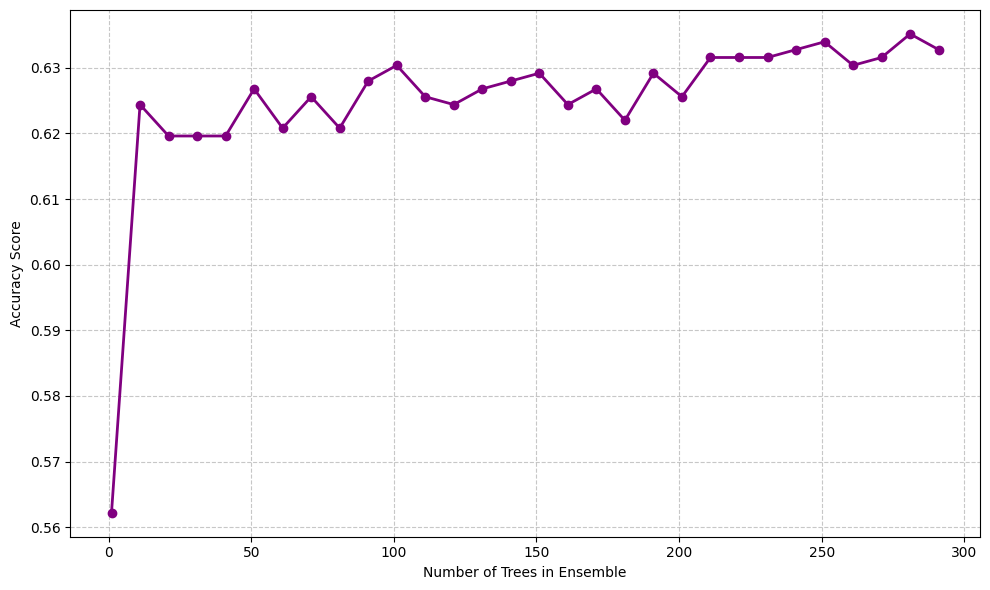

In [5]:
# show performance (eg. accuracy score) as your number of trees in the ensembles increases. 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def random_forest_performance(X, y, max_trees=1000, step=10):
    """
    Train Random Forest models with increasing number of trees and evaluate performance.
    
    Parameters:
    - X: Features
    - y: Target
    - max_trees: Maximum number of trees in the forest
    - step: Step size for number of trees
    
    Returns:
    - List of tree numbers and corresponding accuracy scores
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    n_trees_list = list(range(1, max_trees + 1, step))
    accuracies = []
    
    # Train and evaluate the model for each number of trees
    for n_trees in n_trees_list:
        rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Number of Trees: {n_trees}, Accuracy: {accuracy:.4f}")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_trees_list, accuracies, marker='o', color='purple', linewidth=2)
    plt.xlabel("Number of Trees in Ensemble")
    plt.ylabel("Accuracy Score")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig("random_forest_performance.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    random_forest_performance(X, y, max_trees=300, step=10)

